In [1]:
import numpy as np
from netCDF4 import Dataset
from collections import OrderedDict
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
nc=Dataset('S5P_OFFL_L2__CO_____20181008T132655_20181008T150824_05110_01_010100_20181014T124642.nc','r')

In [3]:
print(nc.ncattrs())
gattrs = nc.ncattrs()

['Conventions', 'institution', 'source', 'history', 'summary', 'tracking_id', 'id', 'time_reference', 'time_reference_days_since_1950', 'time_reference_julian_day', 'time_reference_seconds_since_1970', 'time_coverage_start', 'time_coverage_end', 'time_coverage_duration', 'time_coverage_resolution', 'orbit', 'references', 'processor_version', 'keywords_vocabulary', 'keywords', 'standard_name_vocabulary', 'naming_authority', 'cdm_data_type', 'date_created', 'creator_name', 'creator_url', 'creator_email', 'project', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_lon_min', 'geospatial_lon_max', 'license', 'platform', 'sensor', 'spatial_resolution', 'cpp_compiler_version', 'cpp_compiler_flags', 'f90_compiler_version', 'f90_compiler_flags', 'build_date', 'revision_control_identifier', 'geolocation_grid_from_band', 'identifier_product_doi', 'identifier_product_doi_authority', 'algorithm_version', 'title', 'product_version', 'processing_status', 'Status_MET_2D', 'Status_CTM_CO', 'Stat

In [4]:
for k in gattrs:
    print(nc.getncattr(k))

CF-1.7
KNMI/SRON
Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
2018-10-14 15:05:18 f_s5pops tropnll2dp /mnt/data1/storage_offl_l2/cache_offl_l2/WORKING-564693047/JobOrder.564693037.xml
TROPOMI/S5P CO Column 1-Orbit L2 Swath 7x7km
4b68c0f2-17b5-4897-9f2a-459e5a01ed98
S5P_OFFL_L2__CO_____20181008T132655_20181008T150824_05110_01_010100_20181014T124642
2018-10-08T00:00:00Z
25117
2458399.5
1538956800
2018-10-08T13:48:29Z
2018-10-08T14:46:52Z
PT3503.000S
PT0.540S
5110
http://www.tropomi.eu/data-products/carbon-monoxide
1.1.0
AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
0300 Atmospheric Composition and Structure; 0365 Troposphere, Composition and Chemistry; 1600 Global Change; 1610 Atmosphere
NetCDF Climate and Forecast Metadata Conventions Standard Name Table (v29, 08 July 2015), http://cfconventions.org/standard-names.html
nl.knmi
Swath
2018-10-14T12:46:43Z
The Sentinel 5 Precursor TROPOMI Level 2 products are developed with funding from t

In [5]:
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI/SRON
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2018-10-14 15:05:18 f_s5pops tropnll2dp /mnt/data1/storage_offl_l2/cache_offl_l2/WORKING-564693047/JobOrder.564693037.xml
    summary: TROPOMI/S5P CO Column 1-Orbit L2 Swath 7x7km
    tracking_id: 4b68c0f2-17b5-4897-9f2a-459e5a01ed98
    id: S5P_OFFL_L2__CO_____20181008T132655_20181008T150824_05110_01_010100_20181014T124642
    time_reference: 2018-10-08T00:00:00Z
    time_reference_days_since_1950: 25117
    time_reference_julian_day: 2458399.5
    time_reference_seconds_since_1970: 1538956800
    time_coverage_start: 2018-10-08T13:48:29Z
    time_coverage_end: 2018-10-08T14:46:52Z
    time_coverage_duration: PT3503.000S
    time_coverage_resolution: PT0.540S
    orbit: 5110
    references: http://www.tropomi.eu/data-products/carbon-monoxide
    processor_version: 

In [6]:
type(nc.groups)

collections.OrderedDict

In [7]:
# groups: PRODUCT, METADATA
g = dict(nc.groups)

In [8]:
g['PRODUCT']

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3245), ground_pixel(215), corner(4), time(1), layer(50)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), float32 layer(layer), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), float32 carbonmonoxide_total_column(time,scanline,ground_pixel), float32 carbonmonoxide_total_column_precision(time,scanline,ground_pixel)
    groups: SUPPORT_DATA

In [9]:
g['PRODUCT'].dimensions

OrderedDict([('scanline',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'scanline', size = 3245),
             ('ground_pixel',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'ground_pixel', size = 215),
             ('corner',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'corner', size = 4),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1),
             ('layer',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'layer', size = 50)])

In [10]:
g['PRODUCT'].variables

OrderedDict([('scanline', <class 'netCDF4._netCDF4.Variable'>
              int32 scanline(scanline)
                  units: 1
                  axis: Y
                  long_name: along-track dimension index
                  comment: This coordinate variable defines the indices along track; index starts at 0
                  _FillValue: -2147483647
              path = /PRODUCT
              unlimited dimensions: 
              current shape = (3245,)
              filling on), ('ground_pixel', <class 'netCDF4._netCDF4.Variable'>
              int32 ground_pixel(ground_pixel)
                  units: 1
                  axis: X
                  long_name: across-track dimension index
                  comment: This coordinate variable defines the indices across track, from west to east; index starts at 0
                  _FillValue: -2147483647
              path = /PRODUCT
              unlimited dimensions: 
              current shape = (215,)
              filling on), ('tim

In [11]:
for v in g['PRODUCT'].variables:
    print(v)

scanline
ground_pixel
time
corner
layer
delta_time
time_utc
qa_value
latitude
longitude
carbonmonoxide_total_column
carbonmonoxide_total_column_precision


In [12]:
for v in g['PRODUCT'].variables:
    print(g['PRODUCT'][v])

<class 'netCDF4._netCDF4.Variable'>
int32 scanline(scanline)
    units: 1
    axis: Y
    long_name: along-track dimension index
    comment: This coordinate variable defines the indices along track; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (3245,)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 ground_pixel(ground_pixel)
    units: 1
    axis: X
    long_name: across-track dimension index
    comment: This coordinate variable defines the indices across track, from west to east; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (215,)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 2010-01-01 00:00:00
    standard_name: time
    axis: T
    long_name: reference time for the measurements
    comment: The time in this variable corresponds to the time in the time_reference global attribute
    _FillValue: -2147483647
path = /PRODUCT
u

In [13]:
for v in g['PRODUCT'].variables:
    t = g['PRODUCT'][v]
    print(v)
    print(t[:])

scanline
[   0    1    2 ... 3242 3243 3244]
ground_pixel
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]
time
[276652800]
corner
[0 1 2 3]
layer
[49500. 48500. 47500. 46500. 

In [14]:
t = g['PRODUCT']['carbonmonoxide_total_column']
print(t[:])

[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]]


In [15]:
type(t[0][0][0])

numpy.ma.core.MaskedConstant

In [16]:
latitude = g['PRODUCT']['latitude']
print(latitude[0].shape)

(3245, 215)


In [17]:
longitude = g['PRODUCT']['longitude']
print(longitude[0].shape)

(3245, 215)


In [18]:
co_column = g['PRODUCT']['carbonmonoxide_total_column']
print(co_column[0].shape)

(3245, 215)


In [27]:
ground_pixel = g['PRODUCT']['ground_pixel']
ground_pixel.shape

(215,)

In [28]:
scanline = g['PRODUCT']['scanline']
scanline.shape

(3245,)

## Latitude
It is a matrix, where every line is composed of 215 elements (ground_pixel)
and in total there are 3245 lines (scanline)
(same for Longitude)

In [21]:
latitude_matrix = latitude[0].data
latitude_matrix[0]

array([-72.6843  , -72.79942 , -72.90277 , -72.995674, -73.07927 ,
       -73.154526, -73.22229 , -73.283295, -73.33817 , -73.38748 ,
       -73.431725, -73.47134 , -73.5067  , -73.53817 , -73.566055,
       -73.59064 , -73.61217 , -73.630875, -73.646965, -73.66062 ,
       -73.67203 , -73.68133 , -73.68867 , -73.694176, -73.697975,
       -73.70017 , -73.70087 , -73.70015 , -73.69812 , -73.69484 ,
       -73.69039 , -73.68484 , -73.678246, -73.67067 , -73.66217 ,
       -73.65279 , -73.64258 , -73.63158 , -73.61983 , -73.60737 ,
       -73.59424 , -73.58047 , -73.566086, -73.55112 , -73.53559 ,
       -73.51954 , -73.50298 , -73.48594 , -73.46843 , -73.45048 ,
       -73.43209 , -73.4133  , -73.39411 , -73.37455 , -73.354614,
       -73.33433 , -73.313705, -73.29275 , -73.27147 , -73.249886,
       -73.228004, -73.205826, -73.18337 , -73.16064 , -73.137634,
       -73.11437 , -73.09085 , -73.06708 , -73.04306 , -73.01881 ,
       -72.99431 , -72.96958 , -72.94463 , -72.91945 , -72.894

## MAP
Given the latitude and longitude matrices, for every line of the two matrixes there are 215 points (columns) on the map (lat,long), and in total we can draw 3245 lines.

Since the variable carbonmonoxide_total_column is itself a matrix with the same dimensions as latitude and longitude, every point on the map has a correspondent value of CO concentration


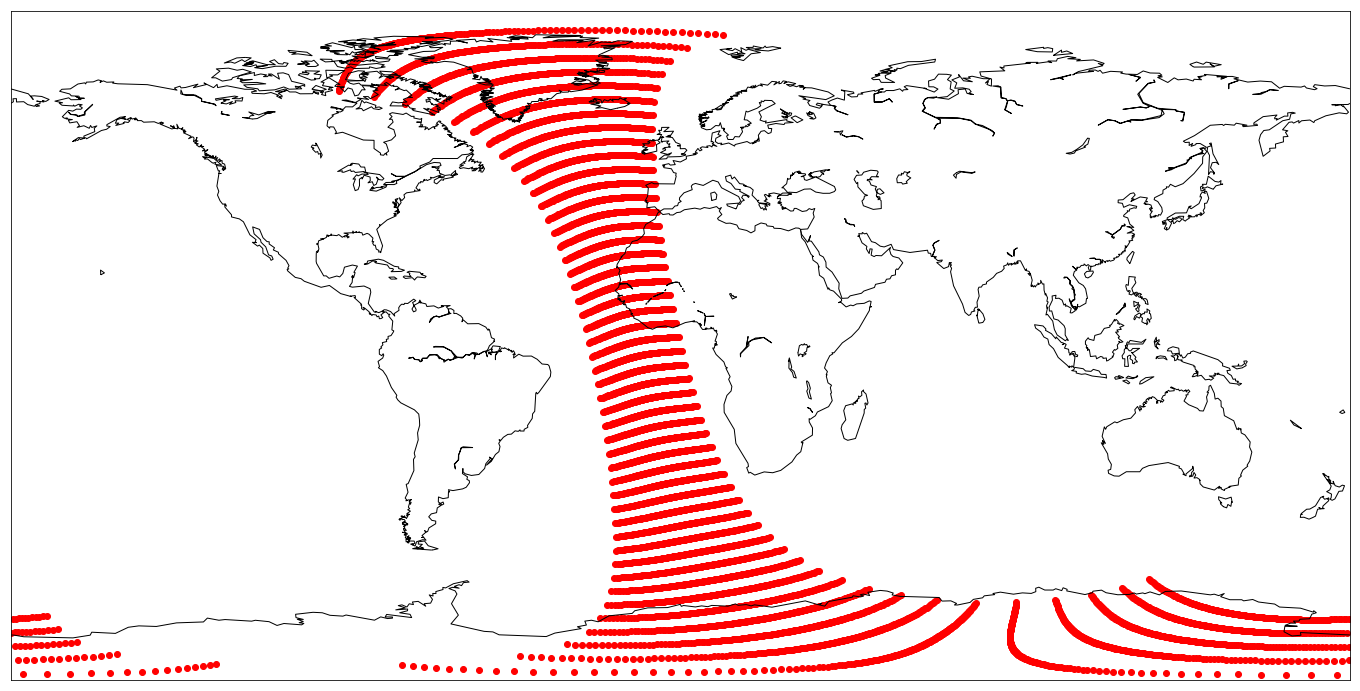

In [24]:
co_column_matrix = g['PRODUCT']['carbonmonoxide_total_column'][0].data
longitude_matrix = longitude[0].data
latitude_matrix = latitude[0].data



def myfunc(x):
    if(x > 100): return 0
    else : return x

#print the data of 50 out of 3245 lines
rows = list(np.linspace(0, 3000, 51, dtype='int'))

fig = plt.figure(figsize=(24,20), edgecolor='w')

m = Basemap(projection='cyl',lat_0=0, lon_0=0)
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()

for x in rows:
    lon =  longitude[0].data[x]
    lat = latitude[0].data[x]
    m.scatter(lon, lat,c = 'r', latlon=True)

plt.show()

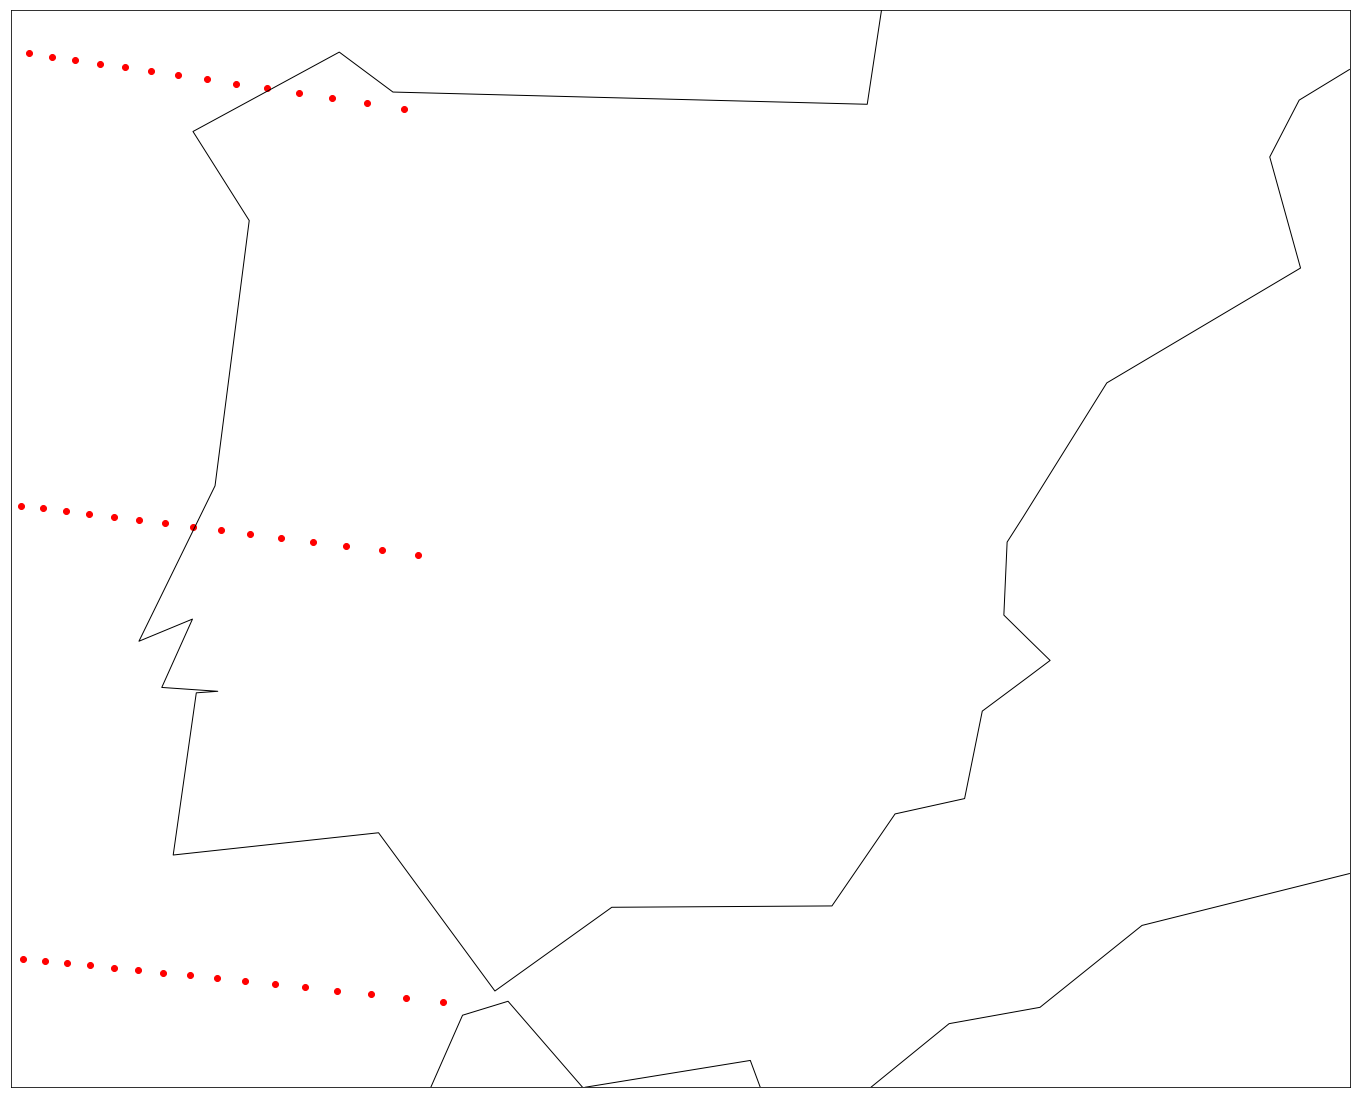

In [25]:
#Zoom on Spain
fig = plt.figure(figsize=(24,20), edgecolor='w')

m = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='c', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
m.drawcoastlines()

for x in rows:
    lon =  longitude[0].data[x]
    lat = latitude[0].data[x]
    m.scatter(lon, lat,c = 'r', latlon=True)
    
plt.show()